<a href="https://colab.research.google.com/github/ezzat123-create/ML-55-19210/blob/main/lastclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
d_q = pd.read_excel('/content/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
d_q.head()
print(d_q.isnull().sum().sum())

549


In [6]:
d_q[col].fillna(d_q[col].mean(), inplace=True)
#d_q[col] = d_q[col].fillna(np.mean)
d_q.ffill(inplace=True)


print(d_q.isnull().sum().sum())
x = d_q.columns[d_q.isna().any()].tolist()
x

NameError: name 'col' is not defined

In [7]:
d_t=pd.read_excel('/content/TRAINING_SOLUTIONS.xlsx')
d_t.head()
print(d_t.isnull().sum().sum())

0


In [8]:
d_cat=pd.read_excel('/content/TRAIN_CATEGORICAL_METADATA_new.xlsx')
d_cat.head()
print(d_cat.isnull().sum().sum())

566


In [7]:
col1 = None  # Resetting col variable
d_cat[col1].fillna(d_cat[col1].mode()[0], inplace=True)  # Fill with the most frequent value
d_cat.ffill(inplace=True)


print(d_cat.isnull().sum().sum())
y = d_cat.columns[d_cat.isna().any()].tolist()
y

KeyError: None

In [9]:
for col in d_cat.columns:  # Iterate over columns in d_cat
    if d_cat[col].dtype == 'object':  # Check if column is of object type (likely categorical)
        d_cat[col].fillna(d_cat[col].mode()[0], inplace=True)  # Fill with the most frequent value
d_cat.ffill(inplace=True)

print(d_cat.isnull().sum().sum())
x = d_cat.columns[d_cat.isna().any()].tolist()
x

2


<ipython-input-9-1dc5bc2761c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_cat[col].fillna(d_cat[col].mode()[0], inplace=True)  # Fill with the most frequent value


['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']

In [10]:

d_cat.fillna({'Barratt_Barratt_P2_Edu': d_cat['Barratt_Barratt_P2_Edu'].mode()}, inplace=True)
d_cat.fillna({'Barratt_Barratt_P2_Occ': d_cat['Barratt_Barratt_P2_Occ'].mode()}, inplace=True)
#d_cat.ffill(inplace=True)

print(d_cat.isnull().sum().sum())
x = d_cat.columns[d_cat.isna().any()].tolist()
x


0


[]

In [11]:
d_fcm=pd.read_csv('/content/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
d_fcm.head()
print(d_fcm.isnull().sum().sum())

9379


In [12]:
#last_col_mode = d_cat[d_cat.columns[-1]].mode()[0]

# Iterate through the columns of d_fcm
for col in d_fcm.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(d_fcm[col]):
        # Fill NaN values with the mean of the column
        d_fcm[col].fillna(d_fcm[col].mean(), inplace=True)
    #else:
        # If the column is not numeric, you might want to handle it differently
        # For example, filling with the most frequent value for categorical data
        #d_fcm[col].fillna(d_fcm[col].mode()[0], inplace=True)
     #    d_fcm[col].fillna(last_col_mode, inplace=True)

# The rest of your code remains the same
d_fcm.ffill(inplace=True)

print(d_fcm.isnull().sum().sum())
z = d_fcm.columns[d_fcm.isna().any()].tolist() # Changed d_q to d_fcm to check for NaNs in the correct DataFrame
z

<ipython-input-12-a37eb792aeda>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_fcm[col].fillna(d_fcm[col].mean(), inplace=True)


0


[]

In [13]:
for col in d_cat.select_dtypes(include=['int']).columns:
    d_cat[col] = d_cat[col].astype('category')

In [14]:
columns_to_encode = d_cat.columns[1:].tolist()
print (columns_to_encode)
d_cat_encoded = pd.get_dummies(columns_to_encode,drop_first=True)
d_cat_encoded=d_cat_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x ))
d_cat_encoded.head()






['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


<ipython-input-14-6c0bbdfb45a5>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d_cat_encoded=d_cat_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x ))


,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,MRI_Track_Scan_Location,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0


In [15]:
d_cat_final=pd.concat([d_cat.drop(columns=columns_to_encode),d_cat_encoded],axis=1)
d_cat_final.head()

,participant_id,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,MRI_Track_Scan_Location,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
0,00aIpNTbG5uh,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00fV0OyyoLfw,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,04X1eiS79T4B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,05ocQutkURd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,06YUNBA9ZRLq,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
#d_cat_fcm=pd.merge(d_fcm,d_cat_final,on='participant_id')
#d_train=pd.merge(d_cat_fcm,d_q,on='participant_id')
d_cat_fcm = pd.merge(d_fcm, d_cat_final, on='participant_id', how='outer')
d_train = pd.merge(d_cat_fcm, d_q, on='participant_id', how='outer')

d_train.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.05143,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [17]:

print(d_train.isna().sum())

participant_id             0
0throw_1thcolumn         880
0throw_2thcolumn         880
0throw_3thcolumn         880
0throw_4thcolumn         880
                        ... 
SDQ_SDQ_Hyperactivity      9
SDQ_SDQ_Internalizing      9
SDQ_SDQ_Peer_Problems      9
SDQ_SDQ_Prosocial          9
MRI_Track_Age_at_Scan    360
Length: 19927, dtype: int64


In [18]:
print(d_train.isnull().sum().sum())

17522181


In [19]:
d_train.fillna(d_train.select_dtypes(include=['number']).mean(), inplace=True)

In [20]:
print(d_train.isnull().sum().sum())

0


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(d_train.drop(columns='participant_id'), d_t['Sex_F'])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
coefficients = pd.Series(model.coef_[0], index=d_train.drop(columns='participant_id').columns)
#Select top features for Sex prediction
top_features1 = coefficients.abs().nlargest(10)
print(top_features1)

MRI_Track_Scan_Location             0.456827
PreInt_Demos_Fam_Child_Race         0.439775
Basic_Demos_Enroll_Year             0.427076
PreInt_Demos_Fam_Child_Ethnicity    0.328889
Barratt_Barratt_P1_Occ              0.282641
Barratt_Barratt_P2_Edu              0.260131
150throw_171thcolumn                0.120672
150throw_164thcolumn                0.115073
148throw_179thcolumn                0.107499
102throw_107thcolumn                0.101249
dtype: float64


In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(d_train.drop(columns='participant_id'), d_t['ADHD_Outcome'])
coefficients = pd.Series(model.coef_[0], index=d_train.drop(columns='participant_id').columns)
top_features = coefficients.abs().nlargest(10)
print(top_features)

Basic_Demos_Study_Site    0.200948
Barratt_Barratt_P2_Occ    0.191538
161throw_190thcolumn      0.129166
151throw_160thcolumn      0.116798
82throw_142thcolumn       0.109790
108throw_197thcolumn      0.108013
9throw_197thcolumn        0.106466
54throw_151thcolumn       0.104345
38throw_94thcolumn        0.103882
31throw_166thcolumn       0.103786
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
common_features1 = list(set(top_features) & set(top_features1))
X_train = d_train.drop(columns = ['participant_id'])
X_train_2 = X_train[common_features1]
X_train_2


""
0
1
2
3
4
...
1208
1209
1210
1211


In [25]:
# prompt: need code that show me that data:X_train_2

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming the data loading and preprocessing steps from the provided code have been executed.
# You need to execute the entire code block above this point first.

# The following line will print the data in X_train_2
X_train_2


""
0
1
2
3
4
...
1208
1209
1210
1211


In [26]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(d_train.drop(columns='participant_id'), d_t['Sex_F'])
selected_features_sex = d_train.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_sex)
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(d_train.drop(columns='participant_id'), d_t['ADHD_Outcome'])
selected_features_ADHD = d_train.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)
common_features = list(set(selected_features_ADHD) & set(selected_features_sex))
X_train = d_train.drop(columns = ['participant_id'])
X_train_3 = X_train[common_features]
X_train_3

Index(['0throw_17thcolumn', '0throw_60thcolumn', '0throw_191thcolumn',
       '1throw_54thcolumn', '1throw_113thcolumn', '1throw_167thcolumn',
       '1throw_185thcolumn', '2throw_63thcolumn', '2throw_165thcolumn',
       '3throw_11thcolumn',
       ...
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=204)
Index(['0throw_3thcolumn', '0throw_44thcolumn', '1throw_42thcolumn',
       '1throw_138thcolumn', '1throw_139thcolumn', '2throw_72thcolumn',
       '2throw_96thcolumn', '2throw_150thcolumn', '2throw_189thcolumn',
       '3throw_138thcolumn',
       ...
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ

,SDQ_SDQ_Conduct_Problems,EHQ_EHQ_Total,SDQ_SDQ_Prosocial,APQ_P_APQ_P_PP,APQ_P_APQ_P_INV,MRI_Track_Age_at_Scan,APQ_P_APQ_P_ID,SDQ_SDQ_Generating_Impact,APQ_P_APQ_P_CP,138throw_180thcolumn,102throw_107thcolumn,ColorVision_CV_Score,SDQ_SDQ_Peer_Problems,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,18throw_98thcolumn,49throw_69thcolumn
0,3.0,100.00,9.0,27.0,44.0,14.274127,15.0,5.0,3.0,0.194195,0.159402,13.0,2.0,14.0,20.0,0.068647,0.017506
1,5.0,92.27,8.0,30.0,35.0,11.245678,12.0,5.0,3.0,0.326263,0.245674,14.0,3.0,25.0,28.0,0.087068,0.236624
2,3.0,86.67,7.0,28.0,37.0,13.463381,21.0,10.0,3.0,0.194195,0.159402,14.0,7.0,18.0,26.0,0.068647,0.017506
3,0.0,93.34,6.0,28.0,42.0,9.572553,11.0,0.0,3.0,0.194195,0.159402,14.0,2.0,15.0,20.0,0.068647,0.017506
4,6.0,0.00,4.0,24.0,35.0,6.654574,12.0,8.0,8.0,0.194195,0.159402,14.0,1.0,22.0,12.0,0.068647,0.017506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.0,100.00,8.0,24.0,41.0,12.669860,11.0,6.0,3.0,0.553867,0.031373,14.0,2.0,16.0,23.0,0.062749,0.440044
1209,1.0,100.00,7.0,29.0,41.0,11.245678,9.0,3.0,3.0,0.592752,0.389458,14.0,4.0,22.0,10.0,0.129175,0.181852
1210,0.0,46.67,8.0,24.0,30.0,8.155258,12.0,3.0,3.0,0.194195,0.159402,13.0,2.0,18.0,14.0,0.068647,0.017506
1211,2.0,46.67,7.0,25.0,42.0,7.364020,18.0,0.0,3.0,0.050400,-0.015408,14.0,0.0,21.0,15.0,-0.100020,0.012698


In [27]:
# prompt: i want to reput the participant id in the x-train3

# Assuming the data loading and preprocessing steps from the provided code have been executed.
# You need to execute the entire code block above this point first.

# Create a copy of X_train_3 to avoid modifying the original DataFrame
X_train3_with_id = X_train_3.copy()

# Insert the 'participant_id' column back into the DataFrame
X_train3_with_id.insert(0, 'participant_id', d_train['participant_id'])

# Now X_train3_with_id contains the participant IDs
X_train3_with_id



,participant_id,SDQ_SDQ_Conduct_Problems,EHQ_EHQ_Total,SDQ_SDQ_Prosocial,APQ_P_APQ_P_PP,APQ_P_APQ_P_INV,MRI_Track_Age_at_Scan,APQ_P_APQ_P_ID,SDQ_SDQ_Generating_Impact,APQ_P_APQ_P_CP,138throw_180thcolumn,102throw_107thcolumn,ColorVision_CV_Score,SDQ_SDQ_Peer_Problems,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,18throw_98thcolumn,49throw_69thcolumn
0,00aIpNTbG5uh,3.0,100.00,9.0,27.0,44.0,14.274127,15.0,5.0,3.0,0.194195,0.159402,13.0,2.0,14.0,20.0,0.068647,0.017506
1,00fV0OyyoLfw,5.0,92.27,8.0,30.0,35.0,11.245678,12.0,5.0,3.0,0.326263,0.245674,14.0,3.0,25.0,28.0,0.087068,0.236624
2,04X1eiS79T4B,3.0,86.67,7.0,28.0,37.0,13.463381,21.0,10.0,3.0,0.194195,0.159402,14.0,7.0,18.0,26.0,0.068647,0.017506
3,05ocQutkURd6,0.0,93.34,6.0,28.0,42.0,9.572553,11.0,0.0,3.0,0.194195,0.159402,14.0,2.0,15.0,20.0,0.068647,0.017506
4,06YUNBA9ZRLq,6.0,0.00,4.0,24.0,35.0,6.654574,12.0,8.0,8.0,0.194195,0.159402,14.0,1.0,22.0,12.0,0.068647,0.017506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,0.0,100.00,8.0,24.0,41.0,12.669860,11.0,6.0,3.0,0.553867,0.031373,14.0,2.0,16.0,23.0,0.062749,0.440044
1209,zpr8w4jCfVPe,1.0,100.00,7.0,29.0,41.0,11.245678,9.0,3.0,3.0,0.592752,0.389458,14.0,4.0,22.0,10.0,0.129175,0.181852
1210,zwBG0rZ05Mcb,0.0,46.67,8.0,24.0,30.0,8.155258,12.0,3.0,3.0,0.194195,0.159402,13.0,2.0,18.0,14.0,0.068647,0.017506
1211,zwXD5v17Rx01,2.0,46.67,7.0,25.0,42.0,7.364020,18.0,0.0,3.0,0.050400,-0.015408,14.0,0.0,21.0,15.0,-0.100020,0.012698


In [28]:
d_train

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,0.188548,0.595451,0.445795,0.441783,0.574207,0.564394,0.516890,0.287743,0.428753,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,11.245678
2,04X1eiS79T4B,0.188548,0.595451,0.445795,0.441783,0.574207,0.564394,0.516890,0.287743,0.428753,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,0.188548,0.595451,0.445795,0.441783,0.574207,0.564394,0.516890,0.287743,0.428753,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.188548,0.595451,0.445795,0.441783,0.574207,0.564394,0.516890,0.287743,0.428753,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,-0.017270,0.856987,0.827741,0.548133,0.800407,0.574002,0.798349,0.284567,0.155855,...,0.0,8.0,0.0,6.0,6.0,6.0,2.0,2.0,8.0,12.669860
1209,zpr8w4jCfVPe,0.342895,0.653258,0.691103,0.271458,0.593868,0.516559,0.360994,0.140348,0.062568,...,1.0,15.0,3.0,8.0,3.0,7.0,7.0,4.0,7.0,11.245678
1210,zwBG0rZ05Mcb,0.188548,0.595451,0.445795,0.441783,0.574207,0.564394,0.516890,0.287743,0.428753,...,0.0,10.0,3.0,5.0,3.0,5.0,5.0,2.0,8.0,8.155258
1211,zwXD5v17Rx01,-0.045660,0.207386,-0.140892,0.053852,0.204124,0.479489,0.333045,0.239930,0.314171,...,2.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020


In [29]:
# prompt: i want to get number of records in xtrain3 data

print(len(X_train_3))
t1_train = d_t.drop(columns = ['participant_id'])
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, multilabel_confusion_matrix # Import multilabel_confusion_matrix


1213


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
 #t1_train = d_t.drop(columns = ['participant_id'])
#from sklearn.model_selection import train_test_split
#X = df.drop(['Label'],axis=1)
#y = df['Label']

X_cv, X_test, y_cv, y_test = train_test_split(X_train_3,t1_train, test_size=0.1, random_state=42)
# Step 1: Pipeline setup
scaler = StandardScaler()
knn = KNeighborsClassifier()
multi_knn = MultiOutputClassifier(knn)

pipe = Pipeline([
    ('scaler', scaler),
    ('knn', multi_knn)
])

# Step 2: Grid search setup
param_grid = {
    'knn__estimator__n_neighbors': list(range(1, 20))
}

# Step 3: Run GridSearchCV on your existing training data
grid_search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_cv,y_cv)
grid_search.best_estimator_.get_params()

# Step 4: Evaluate on your existing test set
y_pred = grid_search.predict(X_test)

# Step 5: Report results
print("Best k:", grid_search.best_params_['knn__estimator__n_neighbors'])

# Overall accuracy for all outputs
print("Overall accuracy:", accuracy_score(y_test, y_pred))

# Accuracy per target
for i, col in enumerate(y_test.columns):
    print(f"{col} accuracy: {accuracy_score(y_test[col], y_pred[:, i]):.3f}")



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e3e58cb41683>", line 30, in <cell line: 0>
    grid_search.fit(X_cv,y_cv)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1024, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1571, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 970, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages

TypeError: object of type 'NoneType' has no len()

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#confusion_matrix(y_test,y_pred)
# Calculate confusion matrix for each label separately
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, multilabel_confusion_matrix # Import multilabel_confusion_matrix
#confusion_matrix(y_test,y_pred)
matrices = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrices for each label
for i, matrix in enumerate(matrices):
    print(f"Confusion Matrix for label {y_test.columns[i]}:")
    print(matrix)
    print("\n")

Confusion Matrix for label ADHD_Outcome:
[[ 2 30]
 [ 7 83]]


Confusion Matrix for label Sex_F:
[[80  9]
 [30  3]]




In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        90
           1       0.25      0.09      0.13        33

   micro avg       0.69      0.70      0.69       123
   macro avg       0.49      0.51      0.48       123
weighted avg       0.60      0.70      0.63       123
 samples avg       0.66      0.61      0.61       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: i want the classification report to be for each label

from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Calculate classification report for each label separately
for i, col in enumerate(y_test.columns):
    print(f"Classification Report for label {col}:")
    print(classification_report(y_test[col], y_pred[:, i]))
    print("\n")


Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.22      0.06      0.10        32
           1       0.73      0.92      0.82        90

    accuracy                           0.70       122
   macro avg       0.48      0.49      0.46       122
weighted avg       0.60      0.70      0.63       122



Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80        89
           1       0.25      0.09      0.13        33

    accuracy                           0.68       122
   macro avg       0.49      0.49      0.47       122
weighted avg       0.60      0.68      0.62       122





In [ ]:
d_t

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [32]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train_3,t1_train, test_size=0.3, random_state=101)
from sklearn.model_selection import GridSearchCV

# Define parameter ranges to try
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
tree = DecisionTreeClassifier()

# Set up grid search
grid_search = GridSearchCV(tree, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Best parameters found:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
# prompt: want to make model of decision tree classifier with those parameters:max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Create and train the decision tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2,criterion='entropy')
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
matrices = multilabel_confusion_matrix(y_test, y_pred_dt)

# Print confusion matrices for each label
for i, matrix in enumerate(matrices):
    print(f"Confusion Matrix for label {y_test.columns[i]}:")
    print(matrix)
    print("\n")


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       256
           1       0.00      0.00      0.00       130

   micro avg       0.69      0.65      0.67       386
   macro avg       0.35      0.49      0.41       386
weighted avg       0.46      0.65      0.54       386
 samples avg       0.69      0.59      0.63       386

Confusion Matrix for label ADHD_Outcome:
[[  0 108]
 [  4 252]]


Confusion Matrix for label Sex_F:
[[230   4]
 [130   0]]




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
# prompt: apply that but on wo labelsoutput:
# def report_model(model):
#     model_preds = model.predict(X_test)
#     print(classification_report(y_test,model_preds))
#     print('\n')
#     plt.figure(figsize=(12,8),dpi=150)
#     plot_tree(model,filled=True,feature_names=X.columns);
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
def report_model(model):
    model_preds = model.predict(X_test)
    for i, col in enumerate(y_test.columns):
        print(f"Classification Report for label {col}:")
        print(classification_report(y_test[col], model_preds[:, i]))
        print('\n')
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=X_train_3.columns);


Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.70      0.98      0.82       256

    accuracy                           0.69       364
   macro avg       0.35      0.49      0.41       364
weighted avg       0.49      0.69      0.58       364



Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.64      0.98      0.77       234
           1       0.00      0.00      0.00       130

    accuracy                           0.63       364
   macro avg       0.32      0.49      0.39       364
weighted avg       0.41      0.63      0.50       364





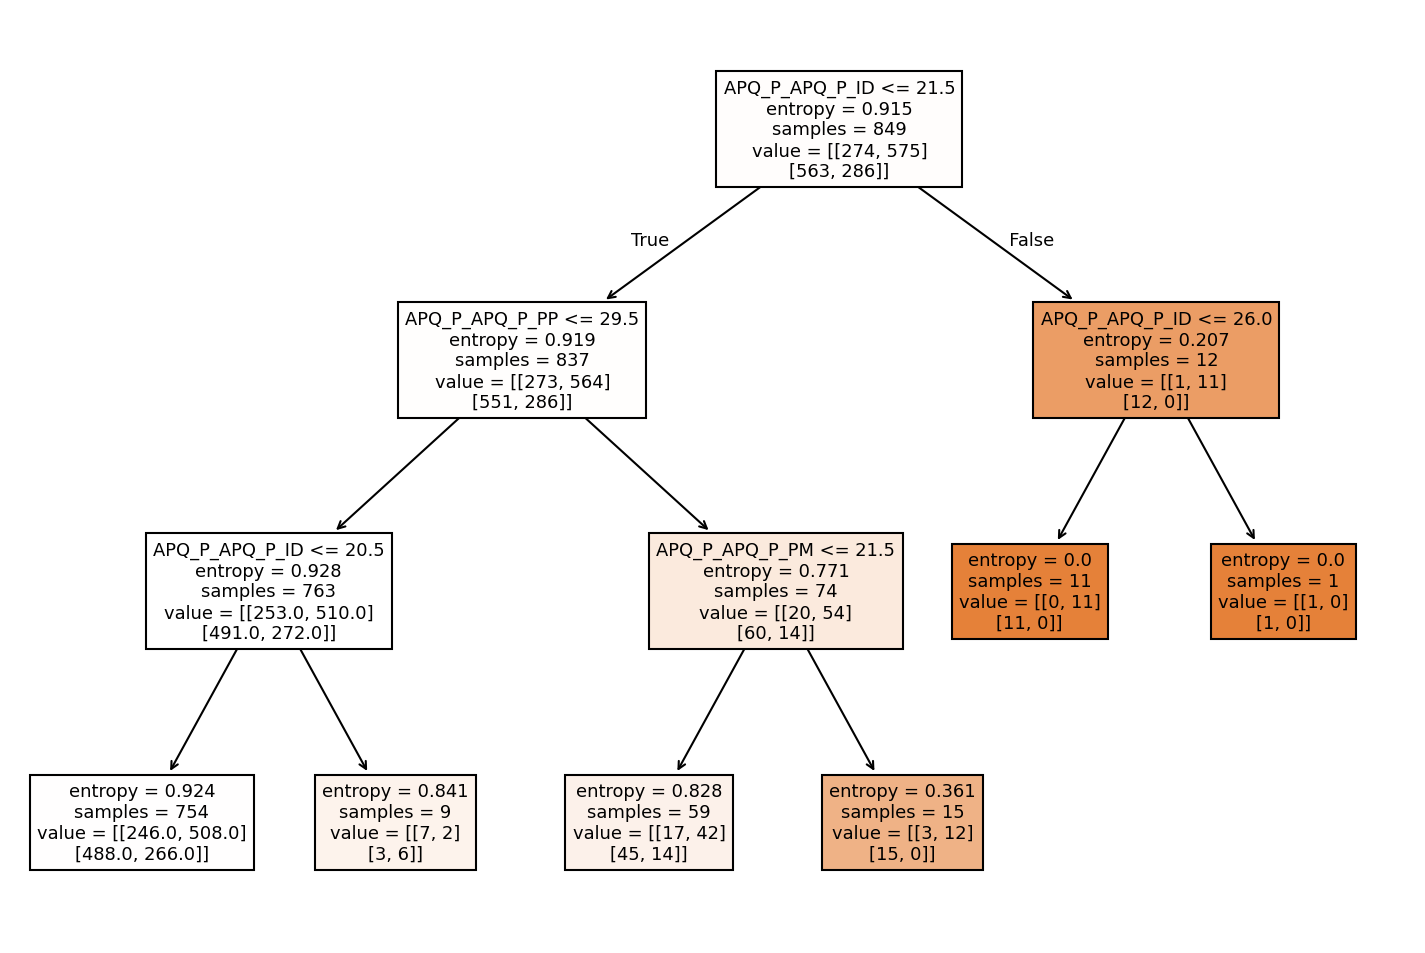

In [42]:
report_model(dt_classifier)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train_3,t1_train, test_size=0.3, random_state=101)
from sklearn.ensemble import RandomForestClassifier

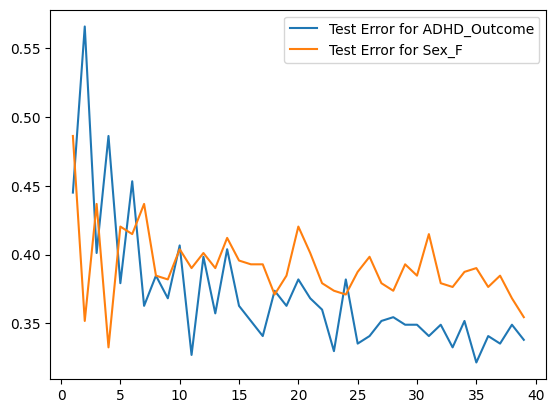

In [33]:
# prompt: from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# from sklearn.ensemble import RandomForestClassifier
# test_error = []
# for n in range(1,40):
#     # Use n random trees
#     model = RandomForestClassifier(n_estimators=n,max_features='auto')
#     model.fit(X_train,y_train)
#     test_preds = model.predict(X_test)
#     test_error.append(1-accuracy_score(test_preds,y_test)) plt.plot(range(1,40),test_error,label='Test Error')
# plt.legend()
# i want to apply same but for that model, it contain two labels so i want it for each label

import matplotlib.pyplot as plt
test_error_per_label = []
for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)

    error_per_label = []
    for i, col in enumerate(y_test.columns):
        error_per_label.append(1 - accuracy_score(y_test.iloc[:,i], test_preds[:, i]))
    test_error_per_label.append(error_per_label)

#Plot for each label
for i, col in enumerate(y_test.columns):
    plt.plot(range(1,40), [errors[i] for errors in test_error_per_label], label=f'Test Error for {col}')
plt.legend()
plt.show()


In [36]:
# prompt: model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
# with lines like that:i want to make two random forest models, one for the first label(ADHD) and make for 11 tress and sex label want to make its model for 4 trees in randomforest

# Assuming X_train_3 and t1_train are defined as in your original code.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# ADHD model (11 trees)
adhd_model = RandomForestClassifier(n_estimators=11, max_features='sqrt', random_state=101)
adhd_model.fit(X_train, y_train['ADHD_Outcome'])

# Sex model (4 trees)
sex_model = RandomForestClassifier(n_estimators=4, max_features='sqrt', random_state=101)
sex_model.fit(X_train, y_train['Sex_F'])

# Now you have two trained models: adhd_model and sex_model


RandomForestClassifier(n_estimators=4, random_state=101)

In [59]:
def report1_model(model, target_label): # Add target_label as input
    model_preds = model.predict(X_test)
    print(f"Classification Report for label {target_label}:")
    print(classification_report(y_test[target_label], model_preds)) # Select the specific label from y_test
    print('\n')
    #plt.figure(figsize=(12,8),dpi=150)
    #plot_tree(model,filled=True,feature_names=X_train_3.columns); # This line might need adjustment for RandomForest


In [46]:
 report1_model(adhd_model,"ADHD_Outcome")

Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.23      0.15      0.18       108
           1       0.69      0.79      0.74       256

    accuracy                           0.60       364
   macro avg       0.46      0.47      0.46       364
weighted avg       0.55      0.60      0.57       364





In [60]:
 report1_model(sex_model,"Sex_F")

Classification Report for label Sex_F:


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [63]:
# prompt: from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()
# log_model.fit(scaled_X_train,y_train)
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
# y_pred = log_model.predict(scaled_X_test)
# accuracy_score(y_test,y_pred)
# confusion_matrix(y_test,y_pred)
# i want top apply that code here for that data , where i need two models one for each label and also output be for each label

# Assuming X_train_3 and t1_train are defined as in your original code.
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# ADHD model
log_model_adhd = LogisticRegression()
log_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_adhd = log_model_adhd.predict(scaled_X_test)

# Sex model
log_model_sex = LogisticRegression()
log_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_sex = log_model_sex.predict(scaled_X_test)

# Evaluate the models
print("ADHD Model:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nSex Model:")
print(classification_report(y_test['Sex_F'], y_pred_sex))
print(confusion_matrix(y_test['Sex_F'], y_pred_sex))


ADHD Model:
              precision    recall  f1-score   support

           0       0.25      0.04      0.06       108
           1       0.70      0.95      0.81       256

    accuracy                           0.68       364
   macro avg       0.48      0.50      0.44       364
weighted avg       0.57      0.68      0.59       364

[[  4 104]
 [ 12 244]]

Sex Model:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       234
           1       0.41      0.07      0.12       130

    accuracy                           0.63       364
   macro avg       0.53      0.51      0.44       364
weighted avg       0.56      0.63      0.54       364

[[221  13]
 [121   9]]


In [64]:
# prompt: i want to apply neurak network on same way

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier # Import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler

# ... (Your existing code for data loading and preprocessing) ...

# Assuming X_train_3 and t1_train are defined as in your original code.
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# ADHD model using MLP Classifier
mlp_model_adhd = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=101) # Adjust parameters as needed
mlp_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_adhd = mlp_model_adhd.predict(scaled_X_test)

# Sex model using MLP Classifier
mlp_model_sex = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=101) # Adjust parameters as needed
mlp_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_sex = mlp_model_sex.predict(scaled_X_test)

# Evaluate the models
print("ADHD Model (MLP):")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nSex Model (MLP):")
print(classification_report(y_test['Sex_F'], y_pred_sex))
print(confusion_matrix(y_test['Sex_F'], y_pred_sex))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ADHD Model (MLP):
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       108
           1       0.73      0.78      0.75       256

    accuracy                           0.64       364
   macro avg       0.55      0.55      0.55       364
weighted avg       0.62      0.64      0.63       364

[[ 34  74]
 [ 57 199]]

Sex Model (MLP):
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       234
           1       0.41      0.29      0.34       130

    accuracy                           0.60       364
   macro avg       0.54      0.53      0.53       364
weighted avg       0.57      0.60      0.58       364

[[180  54]
 [ 92  38]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
d_qtest = pd.read_excel('/content/TEST_QUANTITATIVE_METADATA.xlsx')

In [66]:
d_cattest = pd.read_excel('/content/TEST_CATEGORICAL.xlsx')

In [67]:
d_fcmtest=pd.read_csv('/content/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

In [69]:
# prompt: i want you to make the same pre processing and eliminationg null and merging them in same way i make before for the above three test files and the apply the clssification models of desisin tree and random forest with same parametrs of values of trees for each label and knn with same parametrs above and neural networkon them and then Evaluate each classification technique.there is no solutions that test files only be outputted

import pandas as pd
# Preprocessing for d_qtest
for col in d_qtest.columns:
    if pd.api.types.is_numeric_dtype(d_qtest[col]):
        d_qtest[col].fillna(d_qtest[col].mean(), inplace=True)
d_qtest.ffill(inplace=True)

# Preprocessing for d_cattest
for col in d_cattest.columns:
    if d_cattest[col].dtype == 'object':
        d_cattest[col].fillna(d_cattest[col].mode()[0], inplace=True)
    elif pd.api.types.is_numeric_dtype(d_cattest[col]):
      d_cattest[col].fillna(d_cattest[col].mean(), inplace=True)
d_cattest.ffill(inplace=True)


for col in d_cattest.select_dtypes(include=['int']).columns:
    d_cattest[col] = d_cattest[col].astype('category')
columns_to_encode_test = d_cattest.columns[1:].tolist()
d_cat_encoded_test = pd.get_dummies(d_cattest[columns_to_encode_test], drop_first=True)
d_cat_encoded_test = d_cat_encoded_test.applymap(lambda x: 1 if x is True else (0 if x is False else x))
d_cat_final_test = pd.concat([d_cattest.drop(columns=columns_to_encode_test), d_cat_encoded_test], axis=1)


# Preprocessing for d_fcmtest
for col in d_fcmtest.columns:
    if pd.api.types.is_numeric_dtype(d_fcmtest[col]):
        d_fcmtest[col].fillna(d_fcmtest[col].mean(), inplace=True)
d_fcmtest.ffill(inplace=True)

# Merge the test datasets
d_cat_fcm_test = pd.merge(d_fcmtest, d_cat_final_test, on='participant_id', how='outer')
d_test = pd.merge(d_cat_fcm_test, d_qtest, on='participant_id', how='outer')

d_test.fillna(d_test.select_dtypes(include=['number']).mean(), inplace=True)

# Feature selection (use the common features from training)
X_test_final = d_test[common_features]


# ... (rest of the code for classification models)

# Decision Tree
dt_classifier.fit(X_train_3,t1_train) #fit on the whole training dataset
y_pred_dt_test= dt_classifier.predict(X_test_final)
print("Decision Tree Classifier (Test Data):")
#print(classification_report(y_test, y_pred_dt_test)) #You need a solution file for the test data for evaluation

# Random Forest
adhd_model.fit(X_train_3, t1_train['ADHD_Outcome'])
y_pred_rf_adhd = adhd_model.predict(X_test_final)
print("Random Forest ADHD (Test Data):")
#print(classification_report(y_test['ADHD_Outcome'], y_pred_rf_adhd)) #You need a solution file for the test data for evaluation

sex_model.fit(X_train_3, t1_train['Sex_F'])
y_pred_rf_sex = sex_model.predict(X_test_final)
print("Random Forest Sex (Test Data):")
#print(classification_report(y_test['Sex_F'], y_pred_rf_sex)) #You need a solution file for the test data for evaluation

#KNN
grid_search.fit(X_train_3,t1_train) #fit on the whole training data
y_pred_knn_test = grid_search.predict(X_test_final)
print("KNN (Test Data):")
#print(classification_report(y_test, y_pred_knn_test)) #You need a solution file for the test data for evaluation

# Neural Network
mlp_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_mlp_adhd = mlp_model_adhd.predict(scaler.transform(X_test_final))
print("MLP ADHD (Test Data):")
#print(classification_report(y_test['ADHD_Outcome'], y_pred_mlp_adhd)) #You need a solution file for the test data for evaluation


mlp_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_mlp_sex = mlp_model_sex.predict(scaler.transform(X_test_final))
print("MLP Sex (Test Data):")
#print(classification_report(y_test['Sex_F'], y_pred_mlp_sex)) #You need a solution file for the test data for evaluation


<ipython-input-69-84338e99a091>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_qtest[col].fillna(d_qtest[col].mean(), inplace=True)
<ipython-input-69-84338e99a091>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

NameError: name 'dt_classifier' is not defined